<a href="https://colab.research.google.com/github/MYoussef885/Gold_Price_Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [5]:
path = r'C:\Users\User\dev\training_model\dataset\modified_financial_data.csv'
gold_data = pd.read_csv(path)

In [6]:
# print first five rows in the dataframe
gold_data.head()

,^GSPC,GLD,USO,SLV,EURUSD=X,Date
0,2058.199951,114.080002,159.119995,15.11,1.208941,2015-01-02
1,2020.579956,115.800003,150.320007,15.50,1.194643,2015-01-05
2,2002.609985,117.120003,144.399994,15.83,1.193902,2015-01-06
3,2025.900024,116.430000,146.960007,15.85,1.187536,2015-01-07
4,2062.139893,115.940002,148.399994,15.64,1.183600,2015-01-08


In [7]:
# print the last five rows of the dataframe
gold_data.tail()

,^GSPC,GLD,USO,SLV,EURUSD=X,Date
2508,6040.040039,241.440002,73.650002,27.020000,1.040583,2024-12-24
2509,6037.589844,243.070007,73.129997,27.139999,1.039955,2024-12-26
2510,5970.839844,241.399994,73.849998,26.760000,1.042318,2024-12-27
2511,5906.939941,240.630005,74.820000,26.430000,1.042938,2024-12-30
2512,5881.629883,242.130005,75.550003,26.330000,1.040615,2024-12-31


In [8]:
gold_data.rename(columns={'^GSPC': 'SPX'}, inplace=True)
gold_data.rename(columns={'EURUSD=X': 'EUR/USD'}, inplace=True)

In [9]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD,Date
0,2058.199951,114.080002,159.119995,15.11,1.208941,2015-01-02
1,2020.579956,115.800003,150.320007,15.50,1.194643,2015-01-05
2,2002.609985,117.120003,144.399994,15.83,1.193902,2015-01-06
3,2025.900024,116.430000,146.960007,15.85,1.187536,2015-01-07
4,2062.139893,115.940002,148.399994,15.64,1.183600,2015-01-08


In [10]:
# number of rows and columns
gold_data.shape

(2513, 6)

In [11]:
# getting some information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2513 non-null   float64
 1   GLD      2513 non-null   float64
 2   USO      2513 non-null   float64
 3   SLV      2513 non-null   float64
 4   EUR/USD  2513 non-null   float64
 5   Date     2513 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.9+ KB


In [12]:
# checking number of missing values
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
Date       0
dtype: int64

In [13]:
# statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,3357.000800,150.670633,80.727867,18.722817,1.119123
std,1084.231550,35.249878,28.420000,4.190341,0.052293
min,1829.079956,100.500000,17.040001,11.210000,0.959619
25%,2432.459961,120.129997,67.500000,15.450000,1.084481
50%,3005.699951,144.190002,79.389999,16.980000,1.114964
75%,4205.450195,175.039993,94.239998,21.990000,1.156363
max,6090.270020,257.500000,166.559998,31.740000,1.251001


Correlation:
1. Positive Correlation
2. Negative Correlation

In [14]:
correlation = gold_data.corr

In [15]:
# constructing a heatmap tp understand the correlation
#plt.figure(figsize = (8,8))
#sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap ='Blues')

In [16]:
# correlation values of GLD
#print(correlation['GLD'])

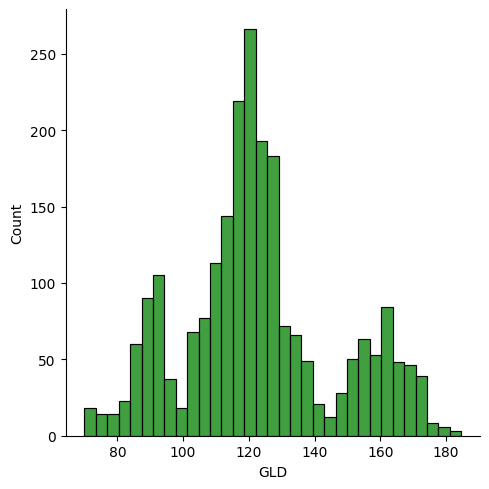

In [17]:
# checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color='green')

Splitting the features and target

In [17]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [18]:
print(X)

              SPX         USO        SLV   EUR/USD
0     2058.199951  159.119995  15.110000  1.208941
1     2020.579956  150.320007  15.500000  1.194643
2     2002.609985  144.399994  15.830000  1.193902
3     2025.900024  146.960007  15.850000  1.187536
4     2062.139893  148.399994  15.640000  1.183600
...           ...         ...        ...       ...
2508  6040.040039   73.650002  27.020000  1.040583
2509  6037.589844   73.129997  27.139999  1.039955
2510  5970.839844   73.849998  26.760000  1.042318
2511  5906.939941   74.820000  26.430000  1.042938
2512  5881.629883   75.550003  26.330000  1.040615

[2513 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test Data

In [26]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
#--- dividing with shuffle=True, should be shuffle=False

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model Training:
Random Forest Regressor

In [27]:
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
# training the model
regressor.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[173.91899994 187.84830246 125.32489899 155.35689957 113.5440007
 109.17090042 159.3769014  181.33839874 125.6887001  126.51010071
 108.76169807 215.43159668 180.16500229 170.30960083 115.16099976
 134.03079865 117.27839912 122.25680077 172.05949905 105.2088002
 112.97039917 201.31240158 118.7318     125.83599937 201.00880005
 148.22740448 121.73619919 104.56319969 184.74049606 137.72600021
 181.71639877 215.4467984  115.20110085 102.94789902 156.76919731
 116.97529945 168.3349968  133.94449951 238.9709993  181.84749878
 120.62119858 168.92399948 173.67520187 142.12959961 122.31040131
 125.79429909 173.00199936 112.98790062 119.5865992  143.49230095
 243.66670273 140.57229752 177.75009857 126.99790077 173.649095
 176.97509659 184.10110031 114.95989998 188.5708992  122.2929995
 168.70720337 187.95789536 145.48240082 158.53719986 108.43529785
 180.10320053 187.43649704 119.72450081 101.69279976 174.66049942
 123.21360115 179.80620117 114.19320084 181.7577005  164.71789963
 154.69210068 2

In [31]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.9965252526396207


Compare the actual values and predicted values in a plot

In [32]:
Y_test = list(Y_test)

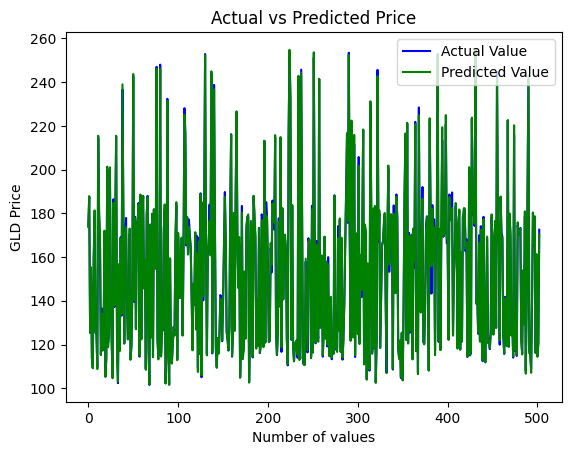

In [33]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()